In [12]:
station_name = "Marshall"
iterations = 300000
mask_years = [2021]
measurements_folder = f"./measurements/{station_name.capitalize()}"

In [13]:
# these imports are used indirectly and are not used in this script, just listed here for reference

import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utils.utils import pretty_lat, pretty_lon, ProgressStatus, plot_n_steps_of_area_from_nc_file

In [14]:
from station.data_submission import DataSubmission


from train_station_twin.training_executor import TrainingExecutor
%matplotlib inline
from utils.utils import plot_measurements_df


Extracting Marshall...


  0%|          | 1/2465 [00:00<09:23,  4.37it/s]

100%|██████████| 2465/2465 [03:42<00:00, 11.06it/s]
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),
/Users/ferdinand/Desktop/MasterThesis/digital-twin-for-weather-station/station/station.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plot_df = plot_df.reindex(pd.date_range(start=plot_df.index.min(),


displaying lon: -105.196
as -105.196


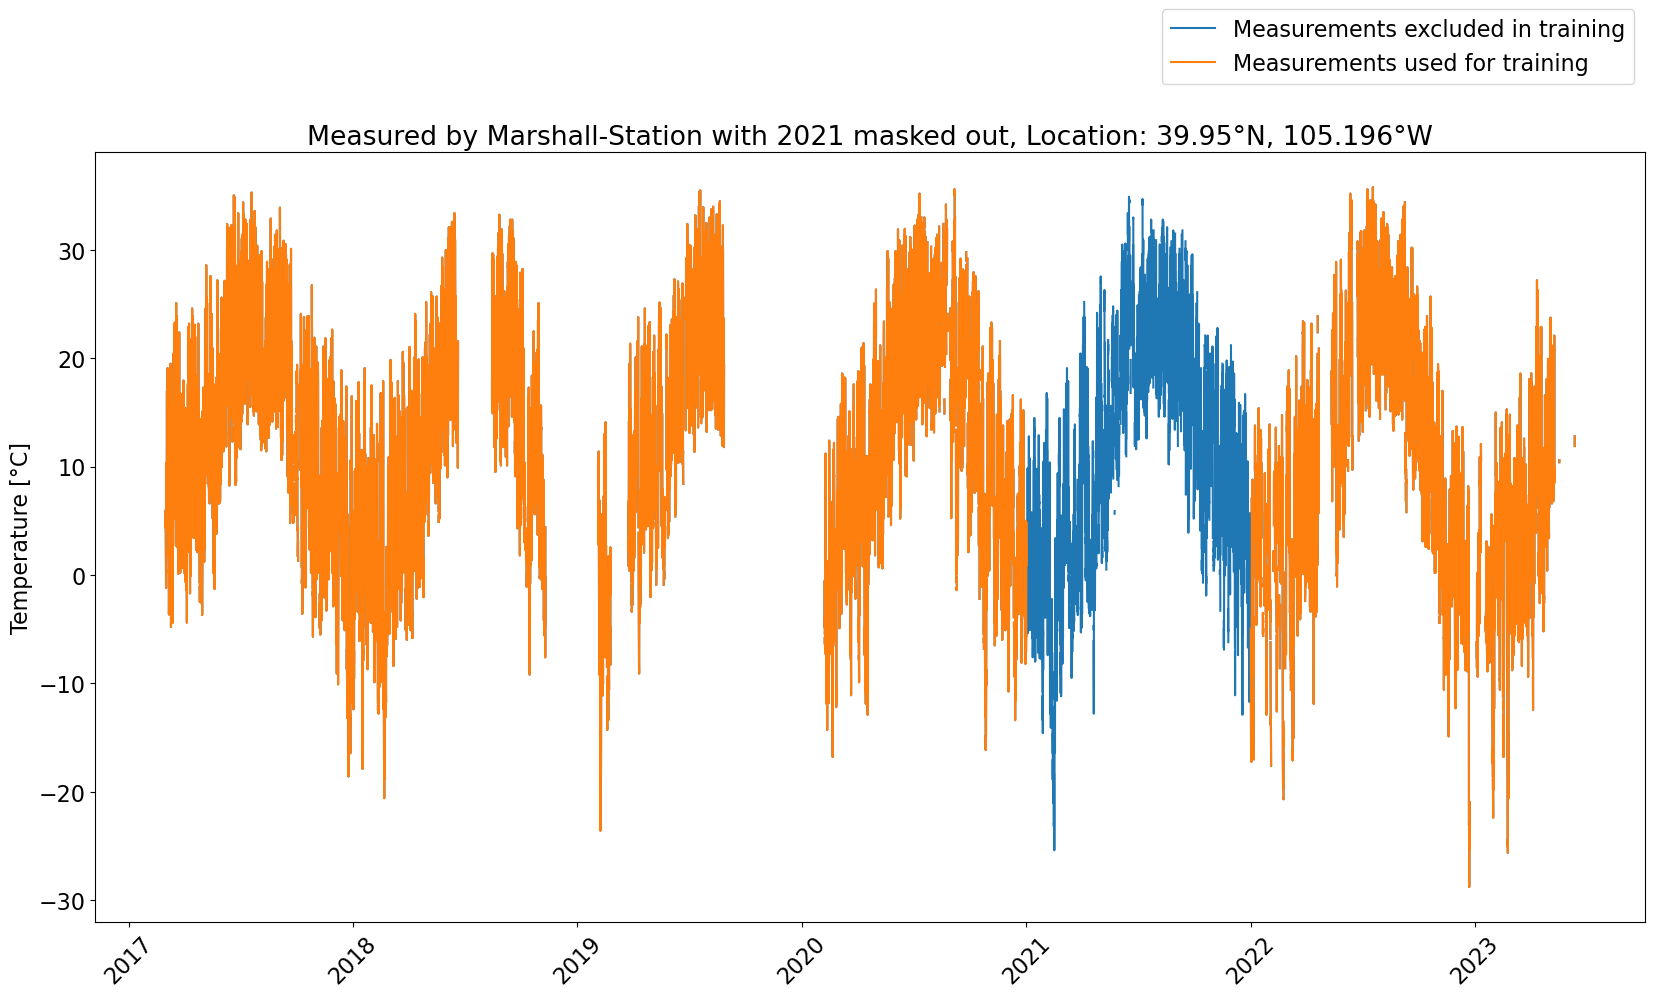

In [15]:
station_submission = DataSubmission(name=station_name, mask_years=mask_years)
station_submission.measurement_dir_path = measurements_folder

station_submission.initialize_station()

In [16]:
training = TrainingExecutor(
    station = station_submission.station,
    progress = station_submission.progress,
    iterations = iterations,
    local = True,
)
job_id = training.execute()

(34188,) hourly temperature values in dataframe
Saving to ./executed_trainings/Marshall_20240726-1122/target_4h2mtxta/train/marshall.nc


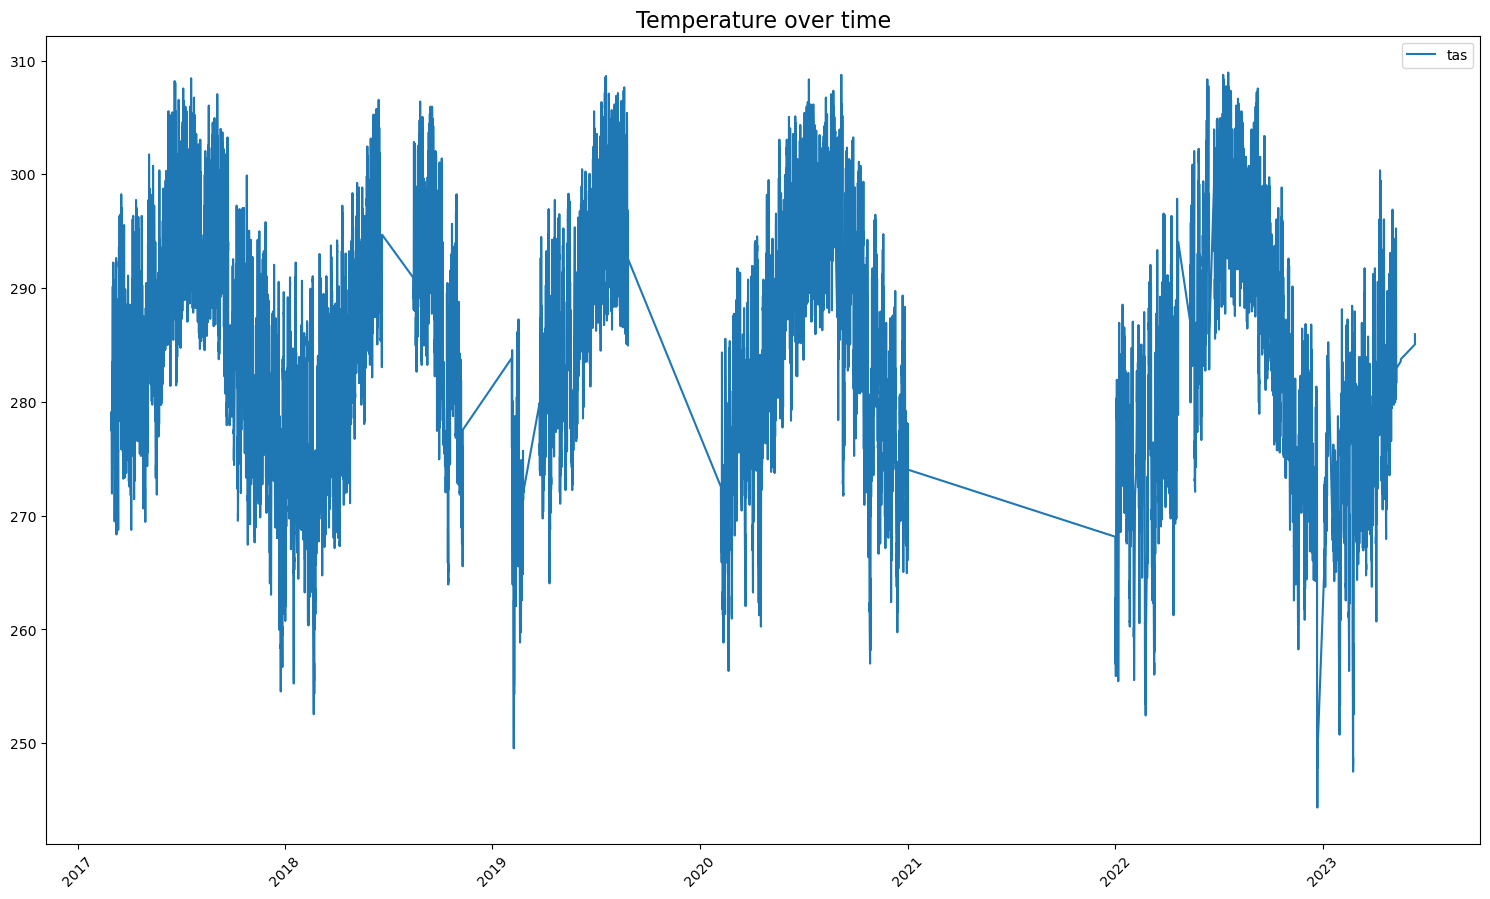

In [17]:
plot_measurements_df(station_submission.station.df)

In [18]:
print(f"Job ID: {job_id}")
print(f"tail -f {training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log")

Job ID: <coroutine object TrainingExecutor.execute at 0x3185749e0>
tail -f ./executed_trainings/Marshall_20240726-1122/temp_4eq6ywqp/slurm_logs/crai_crai-train_<coroutine object TrainingExecutor.execute at 0x3185749e0>.log
